# Assignment 1: Data Description & Exploratory Data Analysis

### Group 35: Prasojo, Naufal (14303440)

### Section 1: Data Description

**1.1 Data Summary**
- **Dataset Name:** Airbnb Prices in European Cities
- **Source:** Kaggle dataset by The Devastator (2021). Available at
https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?utm_source=chatgpt.com
- **License:** CC BY-NC 4.0 (Attribution-NonCommercial).
- **Data Collection:** Listings were web-scraped from Airbnb for 10 European cities (Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, Vienna), but for this assignment we only use Athens data.
     - Each city has two files (weekday and weekend) capturing snapshot prices for 2-night stays for two guests.
     - Approx. 2627~2653 observations (rows) and 19 variables (columns).



**Variable Description**

| Variable Name                        | Type                | Description                                                         |
| :----------------------------------- | :------------------ | :------------------------------------------------------------------ |
| `realSum`                            | Numeric             | Total price (in euros) for the stay.                                |
| `room_type`                          | Categorical         | Type of accommodation (Entire home/apt, Private room, Shared room). |
| `room_shared`                        | Boolean             | 'True' if room is shared; 'False' otherwise.                        |
| `room_private`                       | Boolean             | 'True' if room is private; 'False' otherwise.                       |
| `person_capacity`                    | Integer             | Maximum number of guests.                                           |
| `superhost`                          | Boolean             | 'True' if host is a Superhost status; 'False' otherwise.            |
| `multi`                              | Boolean             | 'True' if host owns 2–4 listings; 'False' otherwise.                |
| `biz`                                | Boolean             | 'True' if host is a business (>4 listings).                         |
| `cleanliness_rating`                 | Numeric (1–10)      | Guest-reported cleanliness rating.                                  |
| `guest_satisfaction_overall`         | Numeric (1–100)     | Overall guest satisfaction score.                                   |
| `bedrooms`                           | Integer             | Number of bedrooms (0 for studio).                                  |
| `dist`                               | Numeric             | Distance from city centre (km).                                     |
| `metro_dist`                         | Numeric             | Distance from nearest metro station (km).                           |
| `attr_index`                         | Numeric             | Local attraction density index.                                     |
| `rest_index`                         | Numeric             | Local restaurant density index.                                     |
| `attr_index_norm`, `rest_index_norm` | Numeric             | Normalized versions of indices for comparability across cities.     |
| `lng`, `lat`                         | Numeric             | Longitude and latitude coordinates of listing.                      |



**1.2 Source and Information**

The data were collected by web-scraping Airbnb public listings around 2020–2021 by The Devastator. The author compiled cleaned CSV files for each city and time category (weekday vs weekend) and license as CC BY-NC 4.0 (Attribution-NonCommercial).

**1.3 Pre-Selection of Variables**

- Variables to keep:

`realSum`, `room_type`, `person_capacity`, `superhost`, `cleanliness_rating`, `guest_satisfaction_overall`, `dist`, `metro_dist`, `attr_index`, `rest_index`,  `weekday/weekend`.

Reasoning: These variables seem most useful for both understanding factors for Airbnb prices or for building a model that can help estimate fair prices for future listings in Athens.

- Variables to drop (initial cleaning phase):

    - `lng`, `lat` – spatial coordinates not needed for non-map models (but can be added later for spatial EDA).
    - `attr_index`, `rest_index` – very similar with normalized versions and may introduce redundancy.
    - `multi`, `biz` – may be reintroduced if host type becomes an interest variable, but initial models will focus on inference model for price.

Reasoning: Variables dropped contain redundant or identifier information not directly useful for predictive or interpretive modelling. All decisions will be re-evaluated after EDA.


### Section 2: Scientific Question

**2.1 Question**

I would like to model and predict listing prices in European Airbnb across various listing Characteristic (e.g `room_type`, `person_capacity`, `superhost`, etc) and Quantitative data (e.g `dist`, `metro_dist`, `attr_index_n`, etc). 

**2.2 Name the response**

The response variable is `realSum`, representing the total price of the Airbnb listing i Europe (especially in Athens where we focus on).

**2.3 Explain whether your question is focused on prediction, inference, or both**

My question focuses on both prediction and inference. I aim to identify which listing and location features significantly influence Airbnb prices (inference) while also building a model that can accurately predict the price of future listings based on these factors.



### Section 3: Exploratory Data Analysis and Visualization

### 3.1 Provide your reproducible code

In [33]:
library(cowplot)
library(tidyverse)
library(ggplot2)

# List CSV files in ./data
csv_files <- list.files("data", pattern = "\\.csv$", full.names = TRUE)
csv_files

# Read each CSV into a named list of data.frames
data_list <- lapply(csv_files, read.csv, stringsAsFactors = FALSE)
names(data_list) <- basename(csv_files)  # names are file names



[1] "data/amsterdam_weekdays.csv" "data/amsterdam_weekends.csv"
 [3] "data/athens_weekdays.csv"    "data/athens_weekends.csv"   
 [5] "data/barcelona_weekdays.csv" "data/barcelona_weekends.csv"
 [7] "data/berlin_weekdays.csv"    "data/berlin_weekends.csv"   
 [9] "data/budapest_weekdays.csv"  "data/budapest_weekends.csv" 
[11] "data/lisbon_weekdays.csv"    "data/lisbon_weekends.csv"   
[13] "data/london_weekdays.csv"    "data/london_weekends.csv"   
[15] "data/paris_weekdays.csv"     "data/paris_weekends.csv"    
[17] "data/rome_weekdays.csv"      "data/rome_weekends.csv"     
[19] "data/vienna_weekdays.csv"    "data/vienna_weekends.csv"

In [34]:
## In R console:
## R.version.string
# version
# install.packages("cowplot")


In [35]:

athens_weekdays <- data_list[["athens_weekdays.csv"]]
athens_weekends <- data_list[["athens_weekends.csv"]]

athens_weekdays <- athens_weekdays %>% select(-lng, -lat, -attr_index, -rest_index, -multi, -biz)
athens_weekends <- athens_weekends %>% select(-lng, -lat, -attr_index, -rest_index, -multi, -biz)

head(athens_weekdays)
head(athens_weekends)

,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,129.82448,Entire home/apt,False,False,4,False,10,100,2,2.8139635,0.8818900,2.086871,5.915160
2,1,138.96375,Entire home/apt,False,False,4,True,10,96,1,0.4072929,0.3045679,9.060559,30.572629
3,2,156.30492,Entire home/apt,False,False,3,True,10,98,1,1.2372111,0.2884881,7.522257,29.731642
4,3,91.62702,Entire home/apt,False,False,4,True,10,99,1,4.3674572,0.2974673,1.500740,4.408047
5,4,74.05151,Private room,False,True,2,False,10,100,1,2.1941850,0.3852657,2.968577,8.509204
6,5,113.88934,Entire home/apt,False,False,6,True,10,96,2,2.0712056,0.4538674,3.641806,11.911981


,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,138.96375,Entire home/apt,False,False,4,True,10,96,1,0.4072777,0.3045697,9.054205,6.0806216
2,1,91.62702,Entire home/apt,False,False,4,True,10,99,1,4.3674631,0.2974735,1.499687,0.8767197
3,2,76.62925,Private room,False,True,2,False,10,100,1,2.1941738,0.3852475,2.966519,1.6924138
4,3,151.85246,Entire home/apt,False,False,4,True,10,100,2,2.5089816,0.5634735,2.591282,1.5107482
5,4,98.65723,Entire home/apt,False,False,2,True,10,95,1,2.7405814,0.7250455,2.370037,1.3830489
6,5,173.88044,Entire home/apt,False,False,4,True,10,97,1,0.8690264,0.4707861,4.986097,3.3054592


In [36]:
columns <- colnames(athens_weekdays)
columns

[1] "X"                          "realSum"                   
 [3] "room_type"                  "room_shared"               
 [5] "room_private"               "person_capacity"           
 [7] "host_is_superhost"          "cleanliness_rating"        
 [9] "guest_satisfaction_overall" "bedrooms"                  
[11] "dist"                       "metro_dist"                
[13] "attr_index_norm"            "rest_index_norm"

In [37]:
# Just to check room types / room shared
# room_shared_weekends <- athens_weekends[athens_weekends$room_shared == 'True', ]
# room_shared_weekends

# Check for missing values
colSums(is.na(athens_weekdays))
colSums(is.na(athens_weekends))

# Summary statistics
summary(athens_weekdays$realSum)
summary(athens_weekends$realSum)

# Cleaning data: removing nonsense outliers
"number obeservations for realSum >= 10000: "
nrow(athens_weekdays[athens_weekdays$realSum >= 10000, ])

athens_weekdays_clean <- athens_weekdays %>% filter(realSum < 10000)
summary(athens_weekdays_clean$realSum)

athens_weekends_clean <- athens_weekends %>% filter(realSum < 10000)
summary(athens_weekends_clean$realSum)

# Combine datasets for comparison plots
athens <- bind_rows(
  athens_weekdays_clean %>% mutate(period = "Weekday"),
  athens_weekends_clean %>% mutate(period = "Weekend")
) %>%
  mutate(period = factor(period, levels = c("Weekday","Weekend")))

head(athens)

X                    realSum 
                         0                          0 
                 room_type                room_shared 
                         0                          0 
              room_private            person_capacity 
                         0                          0 
         host_is_superhost         cleanliness_rating 
                         0                          0 
guest_satisfaction_overall                   bedrooms 
                         0                          0 
                      dist                 metro_dist 
                         0                          0 
           attr_index_norm            rest_index_norm 
                         0                          0

X                    realSum 
                         0                          0 
                 room_type                room_shared 
                         0                          0 
              room_private            person_capacity 
                         0                          0 
         host_is_superhost         cleanliness_rating 
                         0                          0 
guest_satisfaction_overall                   bedrooms 
                         0                          0 
                      dist                 metro_dist 
                         0                          0 
           attr_index_norm            rest_index_norm 
                         0                          0

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   42.88    99.59   127.72   155.87   171.54 18545.45 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.88   98.66  127.72  147.58  171.54 1043.28 

[1] "number obeservations for realSum >= 10000: "

[1] 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.88   99.59  127.72  148.93  171.36 1043.28 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.88   98.66  127.72  147.58  171.54 1043.28 

,X,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,period
,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,129.82448,Entire home/apt,False,False,4,False,10,100,2,2.8139635,0.8818900,2.086871,5.915160,Weekday
2,1,138.96375,Entire home/apt,False,False,4,True,10,96,1,0.4072929,0.3045679,9.060559,30.572629,Weekday
3,2,156.30492,Entire home/apt,False,False,3,True,10,98,1,1.2372111,0.2884881,7.522257,29.731642,Weekday
4,3,91.62702,Entire home/apt,False,False,4,True,10,99,1,4.3674572,0.2974673,1.500740,4.408047,Weekday
5,4,74.05151,Private room,False,True,2,False,10,100,1,2.1941850,0.3852657,2.968577,8.509204,Weekday
6,5,113.88934,Entire home/apt,False,False,6,True,10,96,2,2.0712056,0.4538674,3.641806,11.911981,Weekday


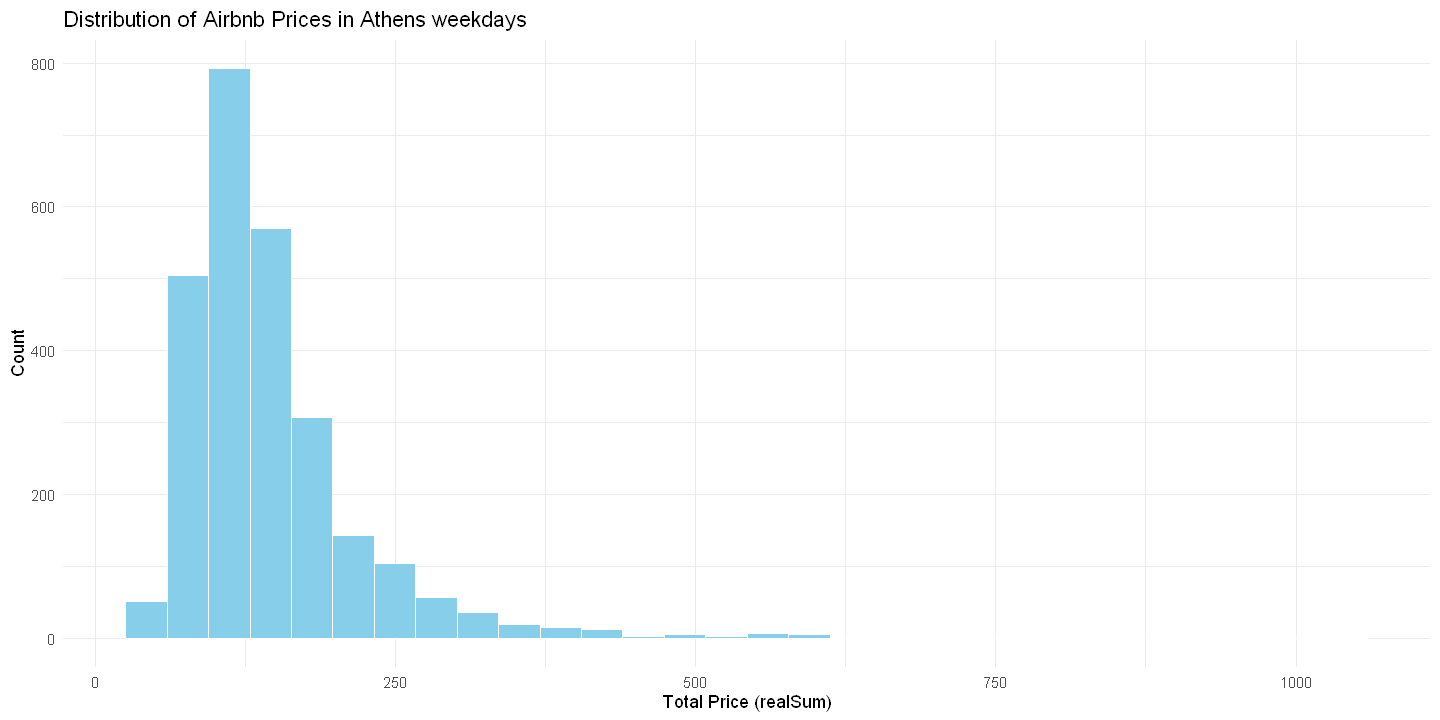

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


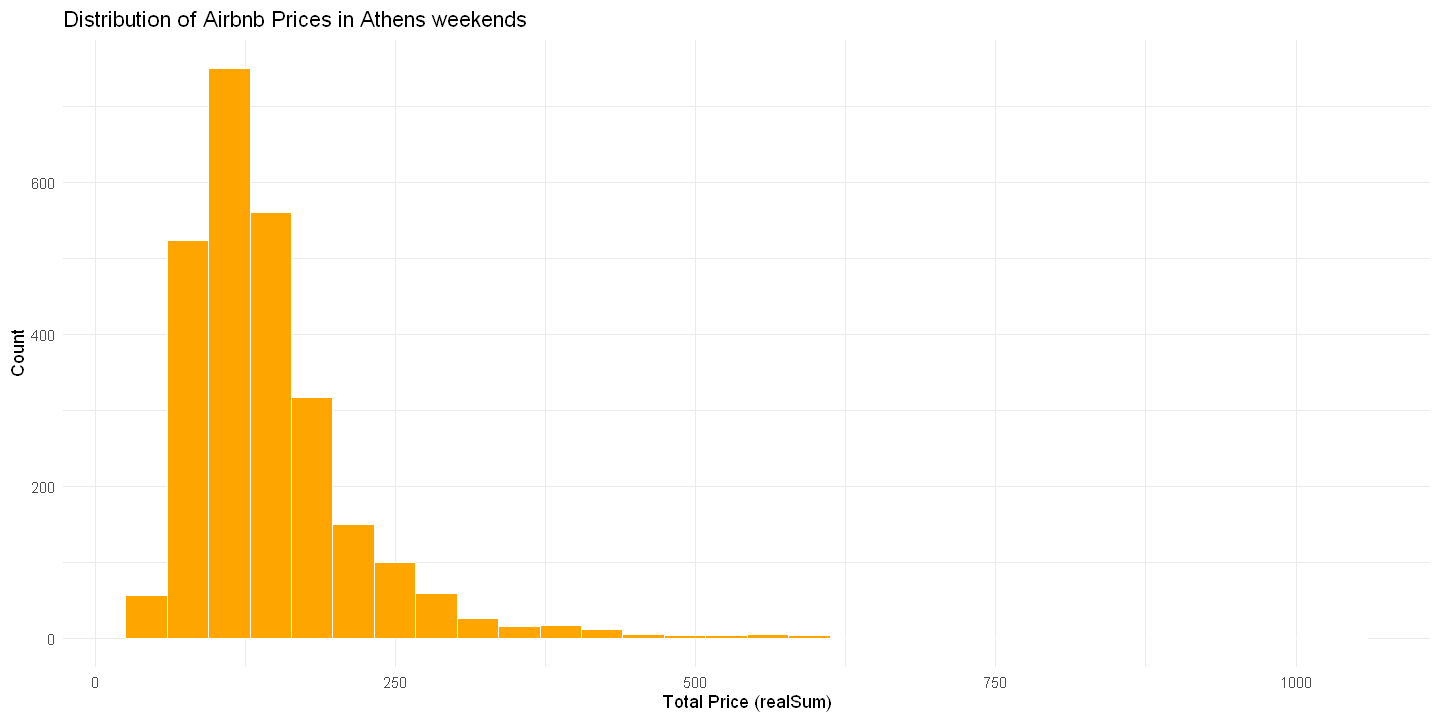

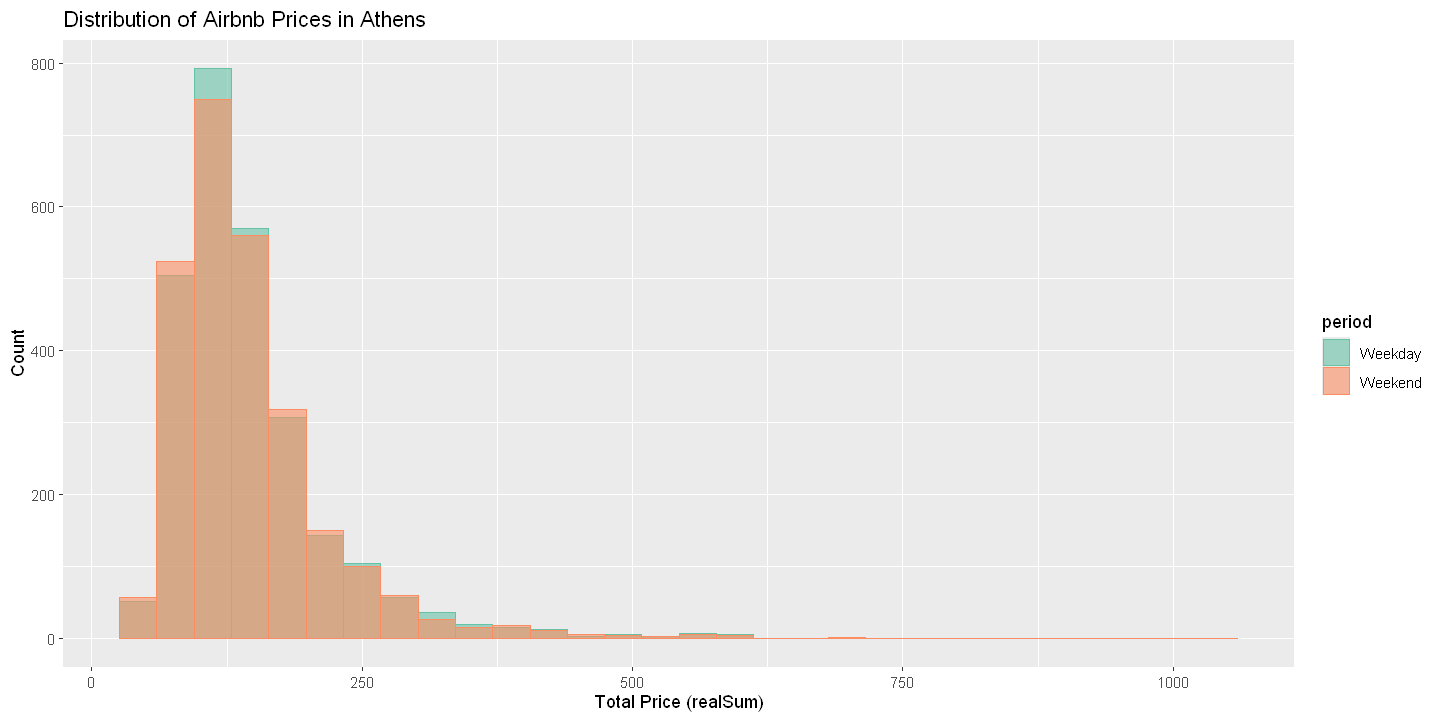

In [38]:
# Visualizing the distribution of prices

distribution_price_weekends <- ggplot(athens_weekends_clean, aes(x = realSum)) +
    geom_histogram(bins = 30, fill = "orange", color = "white") +
    labs(title = "Distribution of Airbnb Prices in Athens weekends",
        x = "Total Price (realSum)",
        y = "Count") +
    theme_minimal()

distribution_price_weekdays <- ggplot(athens_weekdays_clean, aes(x = realSum)) +
    geom_histogram(bins = 30, fill = "skyblue", color = "white") +
    labs(title = "Distribution of Airbnb Prices in Athens weekdays",
        x = "Total Price (realSum)",
        y = "Count") +
    theme_minimal()

options(repr.plot.width = 12, repr.plot.height = 6)
distribution_price_weekdays
distribution_price_weekends

ggplot(athens, aes(x = realSum, fill = period, color = period)) +
  geom_histogram(position = "identity", alpha = 0.6) +
  labs(title = "Distribution of Airbnb Prices in Athens",
        x = "Total Price (realSum)",
        y = "Count") +
  scale_fill_brewer(palette = "Set2") +
  scale_color_brewer(palette = "Set2")

### 3.2 Provide a visualization that you consider relevant to address your question or to explore the data.


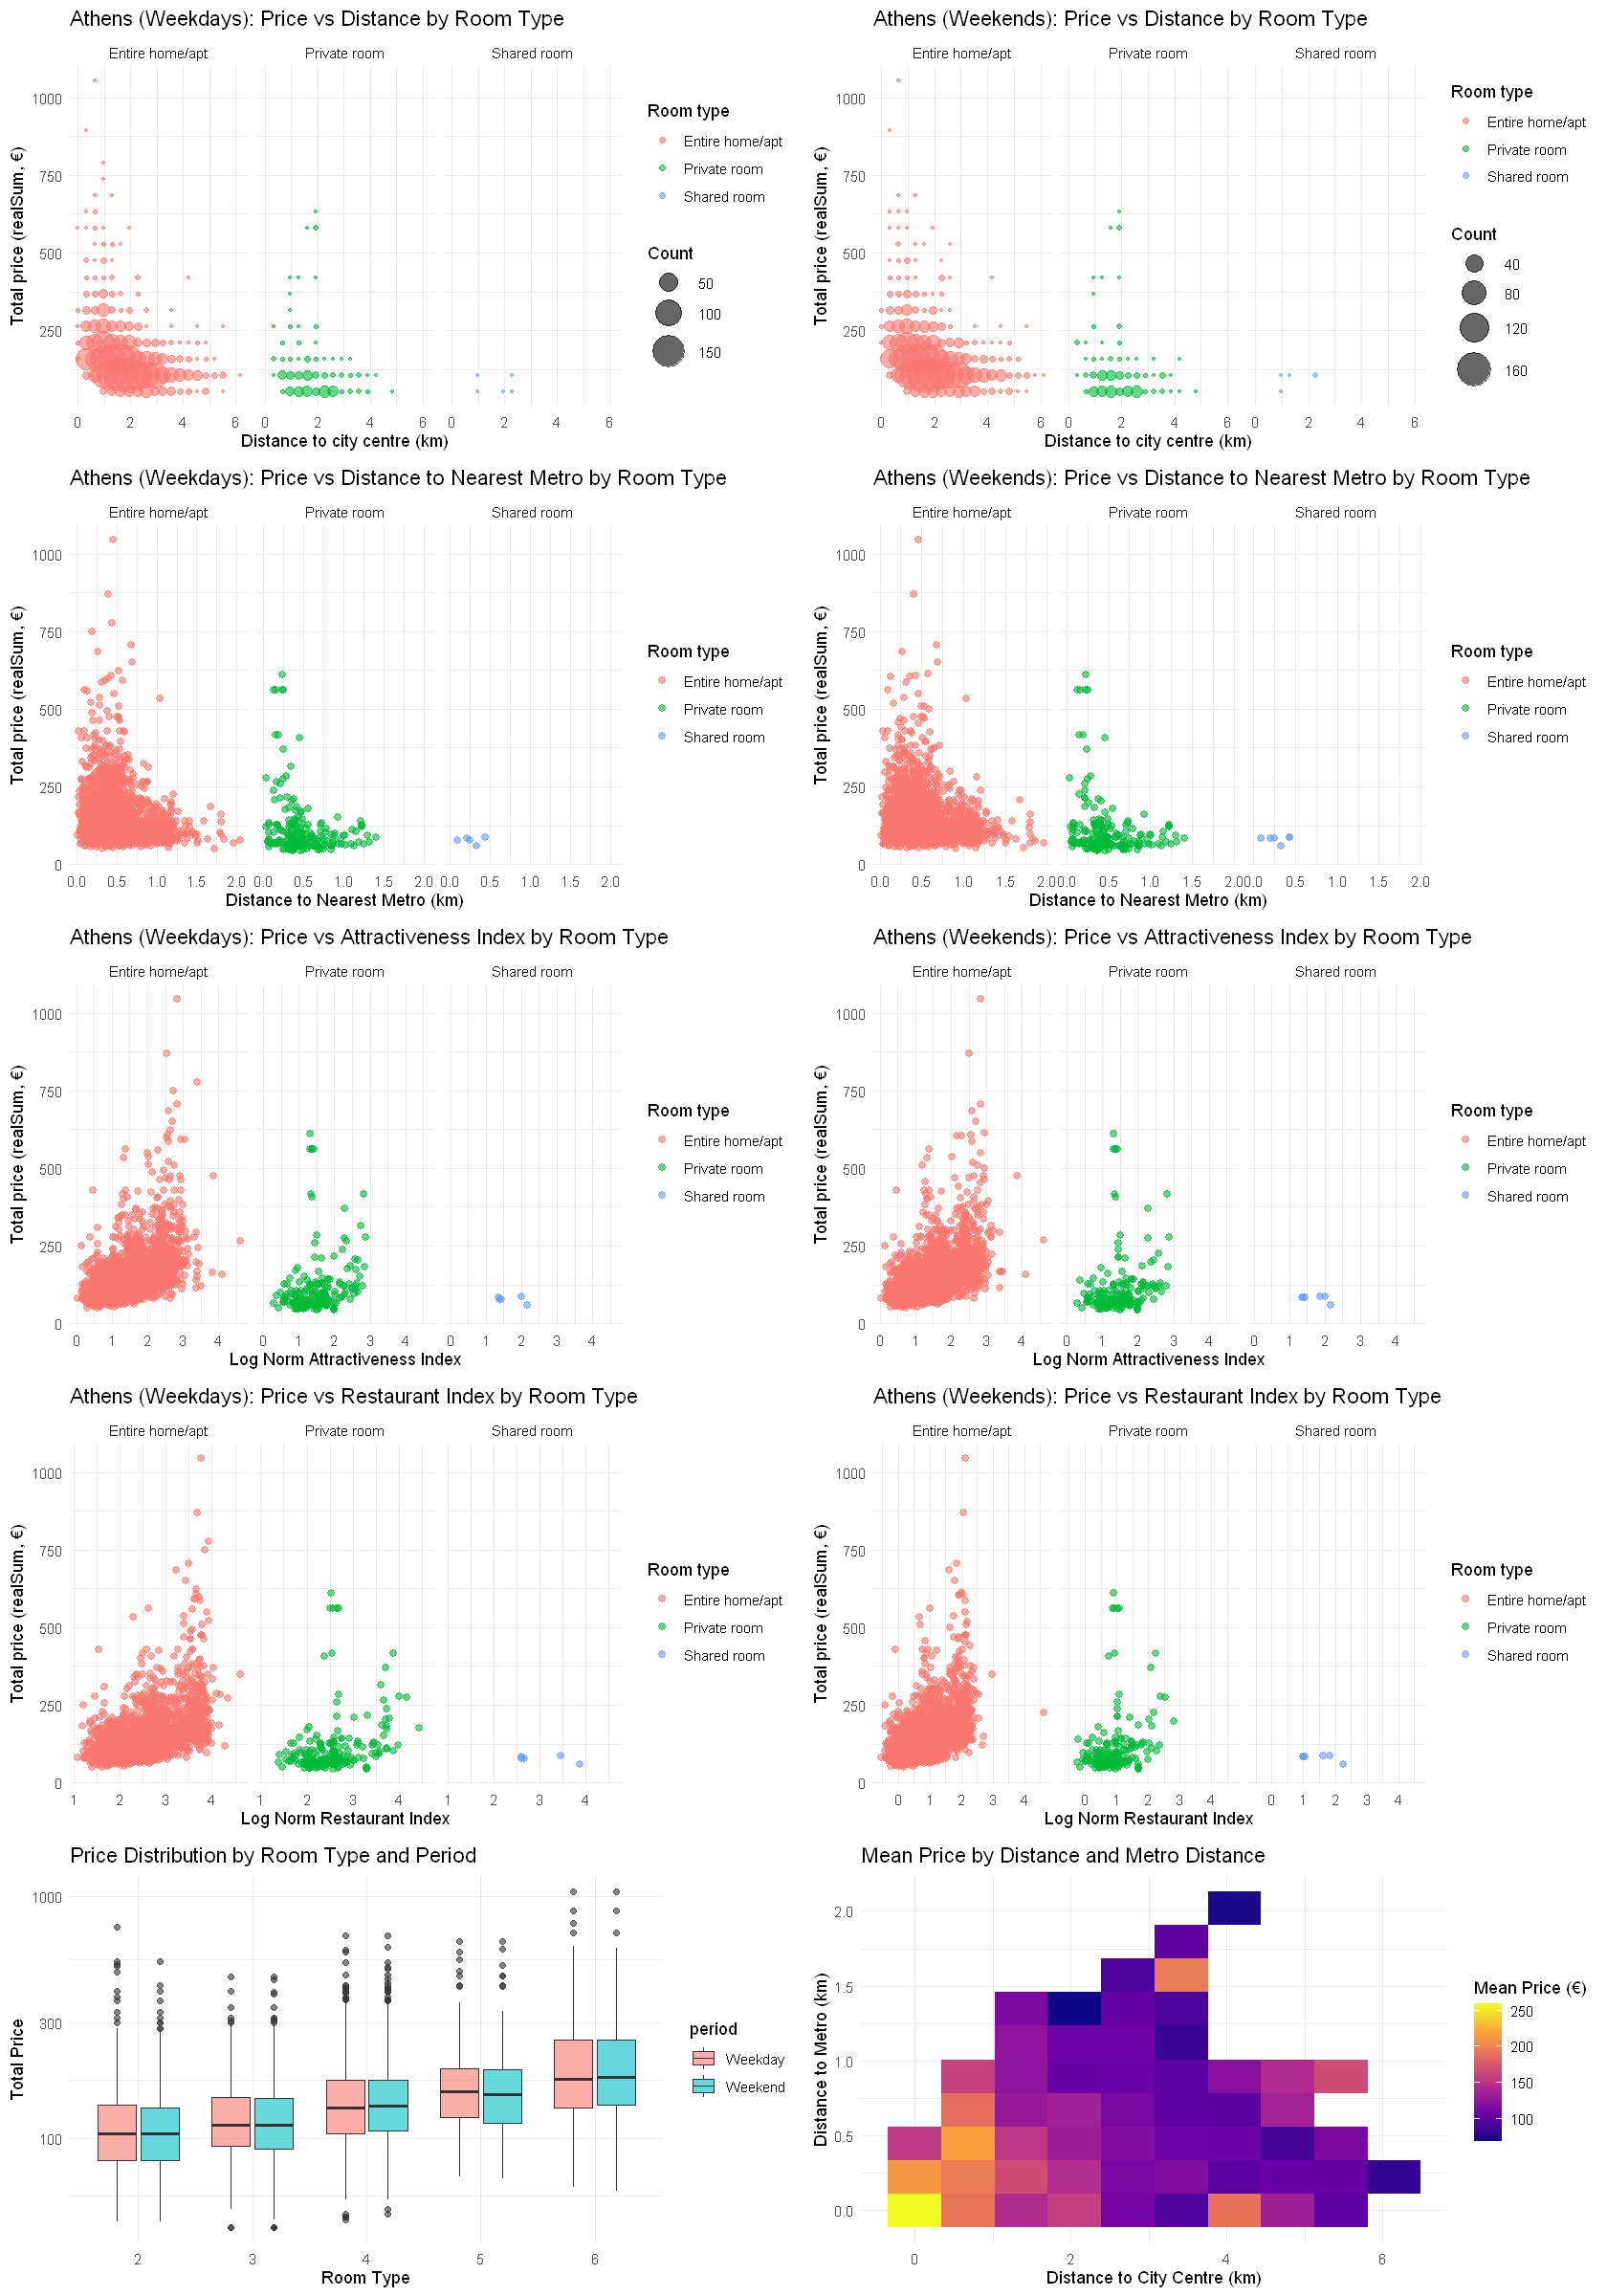

In [39]:
# Scatter plot: price vs distance to city centre, colored by room type
weekdays_price_dist_plot <- ggplot(athens_weekdays_clean,
                                   aes(x = dist, y = realSum, color = room_type)) +
  stat_bin_2d(
    geom = "point",
    bins = 20,
    aes(size = after_stat(count)),  # bubble size = count
    alpha = 0.6,
    show.legend = c(fill = FALSE)   # <-- turn off the fill legend added by stat_bin_2d
  ) +
  facet_wrap(~ room_type) +
  scale_size_area(max_size = 10, name = "Count") +
  guides(fill = "none",                      # extra safety
         colour = guide_legend(title = "Room type"),
         size   = guide_legend(title = "Count")) +
  labs(title = "Athens (Weekdays): Price vs Distance by Room Type",
       y = "Total price (realSum, €)",
       x = "Distance to city centre (km)") +
  theme_minimal()


weekends_price_dist_plot <- ggplot(athens_weekends_clean,
                                   aes(x = dist, y = realSum, color = room_type)) +
  stat_bin_2d(
    geom = "point",
    bins = 20,
    aes(size = after_stat(count)),  # bubble size = count
    alpha = 0.6,
    show.legend = c(fill = FALSE)   # <-- turn off the fill legend added by stat_bin_2d
  ) +
  facet_wrap(~ room_type) +
  scale_size_area(max_size = 10, name = "Count") +
  guides(fill = "none",                      # extra safety
         colour = guide_legend(title = "Room type"),
         size   = guide_legend(title = "Count")) +
  labs(title = "Athens (Weekends): Price vs Distance by Room Type",
       y = "Total price (realSum, €)",
       x = "Distance to city centre (km)") +
  theme_minimal()
  
# metro_dist	attr_index	rest_index
weekdays_price_metro_plot <- ggplot(athens_weekdays_clean, aes(x = metro_dist, y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekdays): Price vs Distance to Nearest Metro by Room Type",
            y = "Total price (realSum, €)",
            x = "Distance to Nearest Metro (km)",
            color = "Room type") +
  theme_minimal()

weekends_price_metro_plot <- ggplot(athens_weekends_clean, aes(x = metro_dist, y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekends): Price vs Distance to Nearest Metro by Room Type",
            x = "Distance to Nearest Metro (km)",
            y = "Total price (realSum, €)",
            color = "Room type") +
    theme_minimal()

weekdays_price_attr_plot <- ggplot(athens_weekdays_clean, aes(x = log(attr_index_norm), y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekdays): Price vs Attractiveness Index by Room Type",
            y = "Total price (realSum, €)",
            x = "Log Norm Attractiveness Index",
            color = "Room type") +
  theme_minimal()

weekends_price_attr_plot <- ggplot(athens_weekends_clean, aes(x = log(attr_index_norm), y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekends): Price vs Attractiveness Index by Room Type",
            x = "Log Norm Attractiveness Index",
            y = "Total price (realSum, €)",
            color = "Room type") +
  theme_minimal()

weekdays_price_rest_plot <- ggplot(athens_weekdays_clean, aes(x = log(rest_index_norm), y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekdays): Price vs Restaurant Index by Room Type",
            y = "Total price (realSum, €)",
            x = "Log Norm Restaurant Index",
            color = "Room type") +
  theme_minimal()

weekends_price_rest_plot <- ggplot(athens_weekends_clean, aes(x = log(rest_index_norm), y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekends): Price vs Restaurant Index by Room Type",
            x = "Log Norm Restaurant Index",
            y = "Total price (realSum, €)",
            color = "Room type") +
  theme_minimal()

price_person_capacity_plot <- ggplot(athens, aes(x = as_factor(person_capacity), y = realSum, fill = period)) +
  geom_boxplot(alpha = 0.6) +
  scale_y_log10() +
  labs(title = "Price Distribution by Room Type and Period",
       y = "Total Price", x = "Room Type") +
  theme_minimal()

price_double_dist_plot <- ggplot(athens, aes(x = dist, y = metro_dist, z = realSum)) +
  stat_summary_2d(fun = mean, bins = 10) +
  scale_fill_viridis_c(option = "C") +
  labs(title = "Mean Price by Distance and Metro Distance",
       x = "Distance to City Centre (km)", y = "Distance to Metro (km)",
       fill = "Mean Price (€)") +
  theme_minimal()

options(repr.plot.width = 14, repr.plot.height = 20)
plot_grid(weekdays_price_dist_plot, weekends_price_dist_plot,
          weekdays_price_metro_plot, weekends_price_metro_plot,
          weekdays_price_attr_plot, weekends_price_attr_plot, 
          weekdays_price_rest_plot, weekends_price_rest_plot,
          price_person_capacity_plot, price_double_dist_plot, ncol = 2)

### 3.3 Provide the following Interpretation

- ### Explain why you consider this plot relevant to address your question or to explore the data.
 
    - It directly connects to response variable (realSum) with the main explanatory factors (e.g Distance, Person Capacity, etc).
    - Comparing weekdays and weekends across room types allows me to see whether the same factors influence prices similarly or differently under changing demand conditions.

- ### Interpret briefly the results obtained.
    - Across all graphs, prices are generally higher for entire homes and listings closer to the city centre or metro stations.
    - The positive association with attractiveness and restaurant indices suggests that listings in more desirable or amenity-rich areas command higher prices.
    - Meanwhile, capacity also raises prices for entire home / aptartment Room Type.

- ### What do you learn from your visualization?
    - I think every factors have an impact determining the listing price, even if some show weaker correlations. Also, there might be other hidden variables, such as how luxury the Airbnb or what facility does the Airbnb have that not included but could strongly influence the listing price. The patterns also show potential non-linear relationships, especially for distance and indices—that may need transformations or interaction terms in future modeling. 